In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Carga de los datos de IRIS
from sklearn import datasets

iris_dt = datasets.load_iris()
iris_dt

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
iris_df = pd.DataFrame(data=np.c_[iris_dt['data'], iris_dt['target']], columns= iris_dt['feature_names'] + ['target'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
iris_df.tail(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
iris_df.groupby('target').size()

target
0.0    50
1.0    50
2.0    50
dtype: int64

###Analisis descriptivo de los datos

In [ ]:
#Separación en entrenamiento y testeo
from sklearn.model_selection import train_test_split

iris_e, iris_t = train_test_split(iris_df, test_size= 0.3, stratify = iris_df['target'], random_state = 100)
#iris_e, iris_t = train_test_split(iris_df, test_size= 0.3, random_state = 100)

In [ ]:
iris_e.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,5.864762,3.075238,3.769524,1.214286,1.000000
std,0.830081,0.411559,1.788969,0.771291,0.820413
min,4.300000,2.200000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.500000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.400000,1.000000
75%,6.400000,3.400000,5.100000,1.800000,2.000000
max,7.900000,4.200000,6.900000,2.500000,2.000000


In [ ]:
iris_e.groupby('target').size()

target
0.0    35
1.0    35
2.0    35
dtype: int64

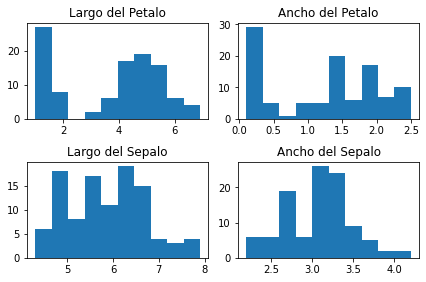

In [ ]:
#Visualización de Análisis de Exploración de Datos

b = 10
fig, axs = plt.subplots(2,2)

axs[0,0].hist(iris_e['petal length (cm)'], bins = b);
axs[0,0].set_title('Largo del Petalo');

axs[0,1].hist(iris_e['petal width (cm)'], bins = b);
axs[0,1].set_title('Ancho del Petalo');

axs[1,0].hist(iris_e['sepal length (cm)'], bins = b);
axs[1,0].set_title('Largo del Sepalo');

axs[1,1].hist(iris_e['sepal width (cm)'], bins = b);
axs[1,1].set_title('Ancho del Sepalo');

fig.tight_layout(pad = 1.0);

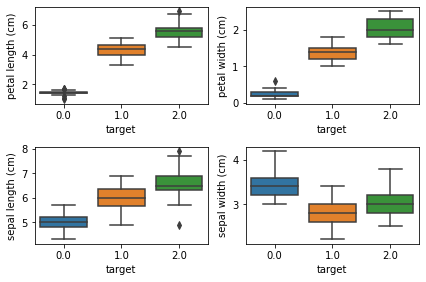

In [ ]:

fig, axs = plt.subplots(2,2)
at = ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']
sp = [0.0, 1.0, 2.0]
sns.boxplot(x= 'target', y = at[0], data= iris_e, order= sp, ax= axs[0,0]);
sns.boxplot(x= 'target', y = at[1], data= iris_e, order= sp, ax= axs[0,1]);
sns.boxplot(x= 'target', y = at[2], data= iris_e, order= sp, ax= axs[1,0]);
sns.boxplot(x= 'target', y = at[3], data= iris_e, order= sp, ax= axs[1,1]);

fig.tight_layout(pad = 1.0);


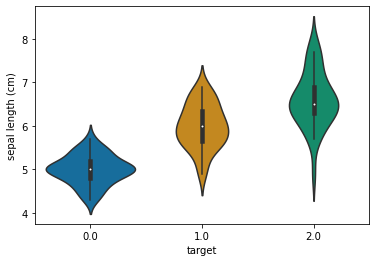

In [ ]:
#Gráfica de Violin
sns.violinplot(x = 'target', y= at[2], data= iris_e, size = 5, order=sp, palette='colorblind');

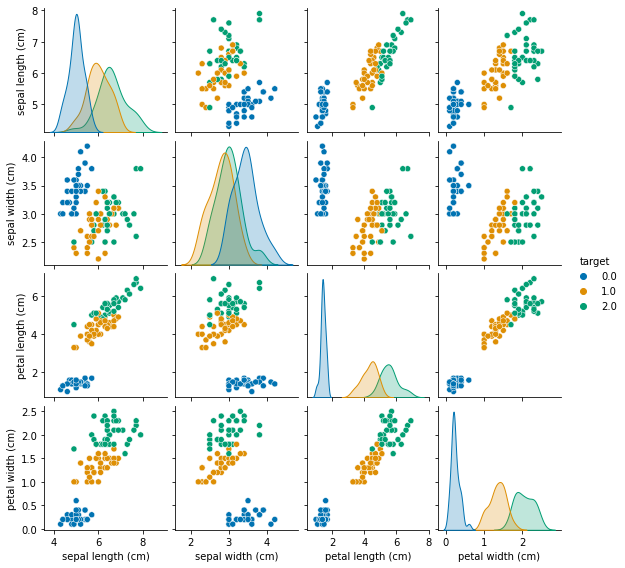

In [ ]:
sns.pairplot(iris_e, hue='target', height=2, palette='colorblind');

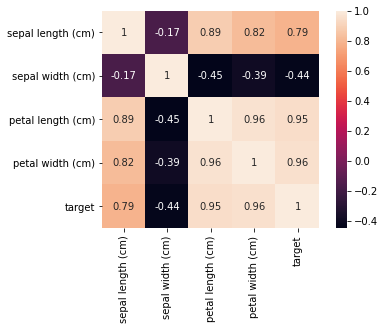

In [ ]:
matriz_correlacion = iris_e.corr()
sns.heatmap(matriz_correlacion, annot=True, square=True);

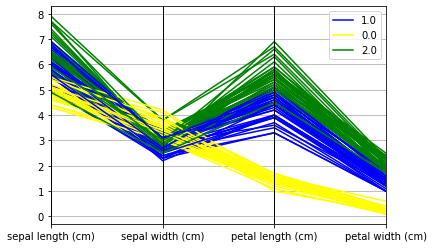

In [ ]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris_e, 'target', color=['blue', 'yellow', 'green']);

#Creación del Modelo

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(C = 1e5)

#entrenar el modelo
X_train = np.c_[iris_e['petal length (cm)'], iris_e['petal width (cm)']]
y_train = iris_e['target']
modelo.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

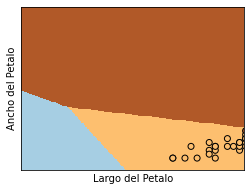

In [ ]:
#Visualizar el modelo de clasificación

x_min, x_max = X_train[0].min() - .5, X_train[0].max() + .5
y_min, y_max = X_train[1].min() - .5, X_train[1].max() + .5
h = .02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo.predict(np.c_[xx.ravel(),yy.ravel()])

#añadir color a la gráfica
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4,3))
plt.pcolormesh(xx,yy,Z, cmap=plt.cm.Paired)

plt.scatter(iris_e['petal length (cm)'], iris_e['petal width (cm)'], c=iris_e['target'], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Largo del Petalo')
plt.ylabel('Ancho del Petalo')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

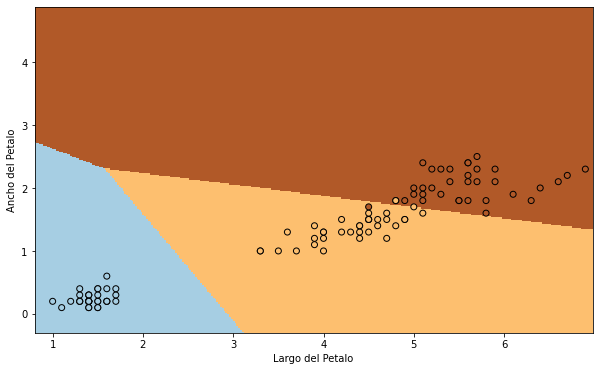

In [ ]:
#Visualizar el modelo de clasificación - Datos de Entrenamiento

x_min, x_max = X_train[0].min() - .5, X_train[0].max() + 3
y_min, y_max = X_train[1].min() - 1.5, X_train[1].max() + .5
h = .02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo.predict(np.c_[xx.ravel(),yy.ravel()])

#añadir color a la gráfica
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10,6))
plt.pcolormesh(xx,yy,Z, cmap=plt.cm.Paired)

plt.scatter(iris_e['petal length (cm)'], iris_e['petal width (cm)'], c=iris_e['target'], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Largo del Petalo')
plt.ylabel('Ancho del Petalo')

plt.show()

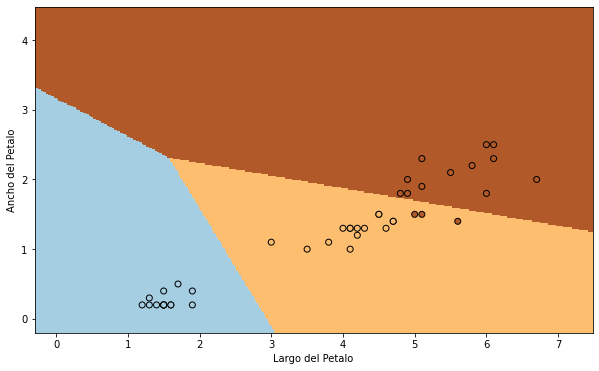

In [ ]:
#Probar el modelo con generalización
X_test = np.c_[iris_t['petal length (cm)'], iris_t['petal width (cm)']]
y_test = iris_t['target']
#Visualizar el modelo de clasificación - Datos de Testeo

x_min, x_max = X_test[0].min() - .5, X_test[0].max() + 6
y_min, y_max = X_test[1].min() - 1.5, X_test[1].max() + .5
h = .02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo.predict(np.c_[xx.ravel(),yy.ravel()])

#añadir color a la gráfica
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10,6))
plt.pcolormesh(xx,yy,Z, cmap=plt.cm.Paired)

plt.scatter(iris_t['petal length (cm)'], iris_t['petal width (cm)'], c=iris_t['target'], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Largo del Petalo')
plt.ylabel('Ancho del Petalo')

plt.show()

In [ ]:
def probar(algoritmo):
  modelo = algoritmo

  #entrenar el modelo
  X_train = np.c_[iris_e['petal length (cm)'], iris_e['petal width (cm)']]
  y_train = iris_e['target']
  modelo.fit(X_train, y_train)

  #Visualizar el modelo de clasificación

  x_min, x_max = X_train[0].min() - .5, X_train[0].max() + 3
  y_min, y_max = X_train[1].min() - 1.5, X_train[1].max() + .5
  h = .02

  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = modelo.predict(np.c_[xx.ravel(),yy.ravel()])

  #añadir color a la gráfica
  Z = Z.reshape(xx.shape)
  plt.figure(1, figsize=(10,6))
  plt.pcolormesh(xx,yy,Z, cmap=plt.cm.Paired)

  plt.scatter(iris_e['petal length (cm)'], iris_e['petal width (cm)'], c=iris_e['target'], edgecolors='k', cmap=plt.cm.Paired)
  plt.xlabel('Largo del Petalo')
  plt.ylabel('Ancho del Petalo')

  plt.show()

  x_min, x_max = X_test[0].min() - .5, X_test[0].max() + 6
  y_min, y_max = X_test[1].min() - 1.5, X_test[1].max() + .5
  h = .02

  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = modelo.predict(np.c_[xx.ravel(),yy.ravel()])

  #añadir color a la gráfica
  Z = Z.reshape(xx.shape)
  plt.figure(1, figsize=(10,6))
  plt.pcolormesh(xx,yy,Z, cmap=plt.cm.Paired)

  plt.scatter(iris_t['petal length (cm)'], iris_t['petal width (cm)'], c=iris_t['target'], edgecolors='k', cmap=plt.cm.Paired)
  plt.xlabel('Largo del Petalo')
  plt.ylabel('Ancho del Petalo')

  plt.show()

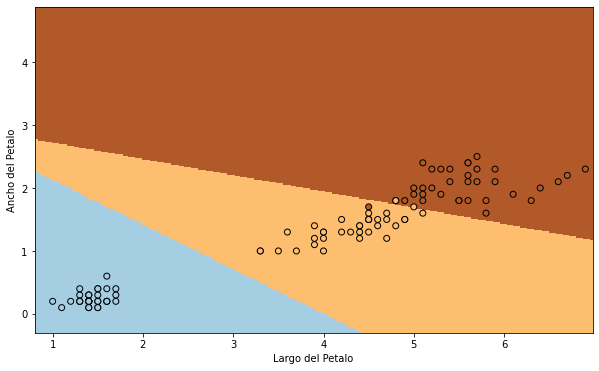

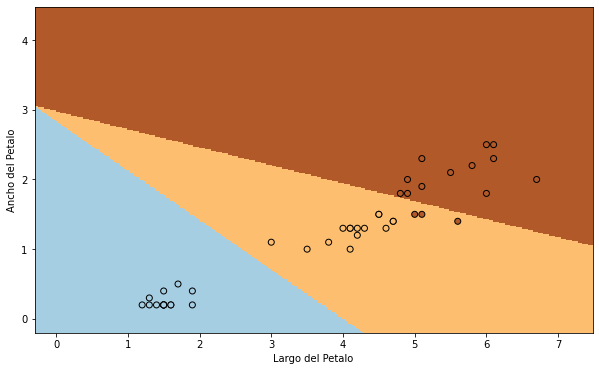

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

probar(LinearDiscriminantAnalysis())

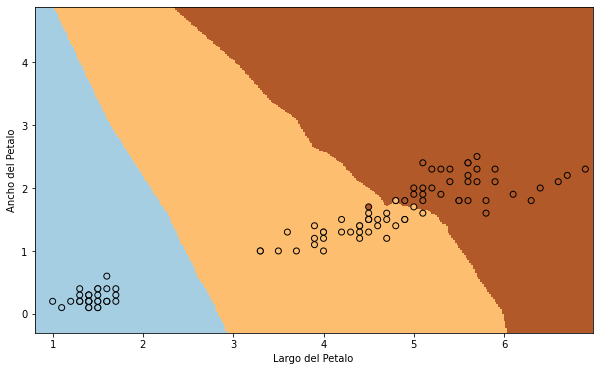

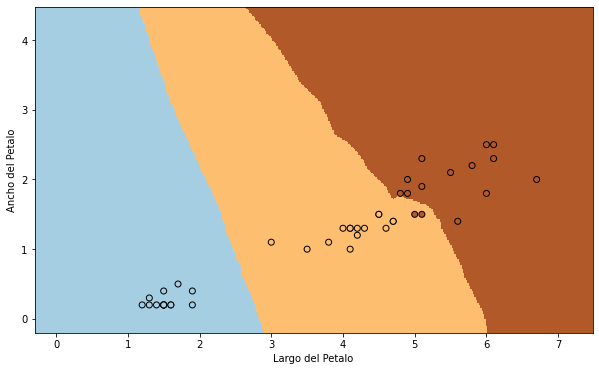

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
probar(KNeighborsClassifier())

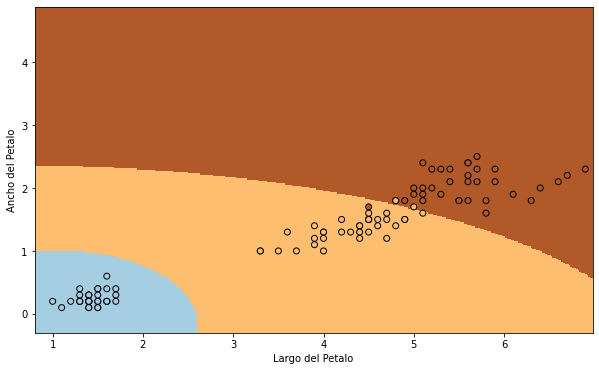

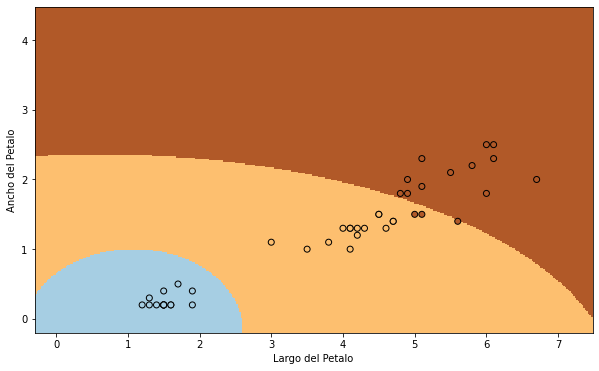

In [ ]:
from sklearn.naive_bayes import GaussianNB
probar(GaussianNB())

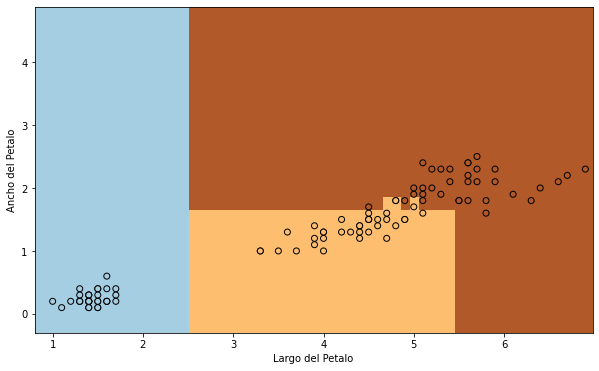

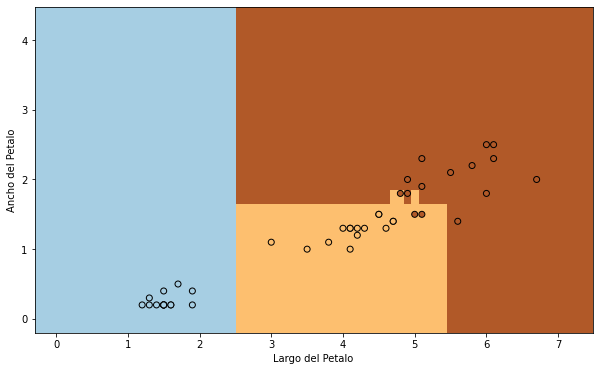

In [ ]:
from sklearn.tree import DecisionTreeClassifier
probar(DecisionTreeClassifier())

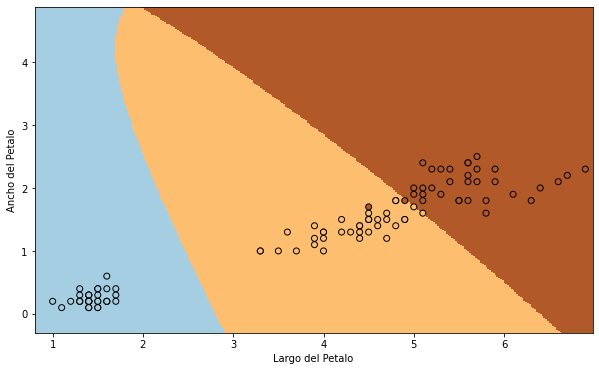

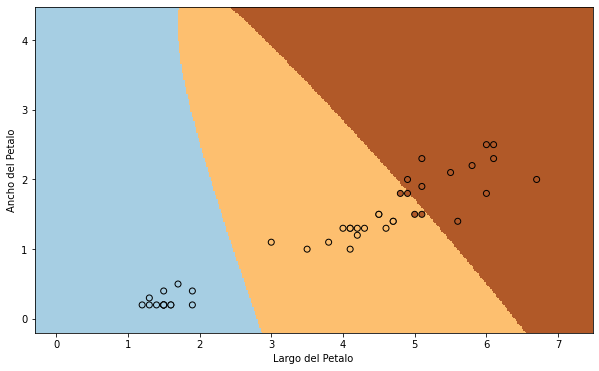

In [ ]:
from sklearn.svm import SVC
probar(SVC())

In [ ]:
from sklearn import model_selection

modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('DTC', DecisionTreeClassifier()))
modelos.append(('GNB', GaussianNB()))
modelos.append(('SVM', SVC()))

#Evaluar cada modelo
resultados = []
nombres = []
for nombre, model in modelos:
  resultados_parciales = model_selection.cross_val_score(model, X_train, y_train, scoring = 'accuracy')
  resultados.append(resultados_parciales)
  nombres.append(nombre)

  print("Modelo: " + nombre + " Promedio: " + str(resultados_parciales.mean()) + " STD: " + str(resultados_parciales.std()))

Modelo: LR Promedio: 0.9619047619047618 STD: 0.04665694748158434
Modelo: LDA Promedio: 0.9714285714285715 STD: 0.023328473740792194
Modelo: KNN Promedio: 0.9714285714285715 STD: 0.0380952380952381
Modelo: DTC Promedio: 0.9428571428571428 STD: 0.04665694748158436
Modelo: GNB Promedio: 0.9714285714285715 STD: 0.023328473740792194
Modelo: SVM Promedio: 0.9619047619047618 STD: 0.04665694748158434


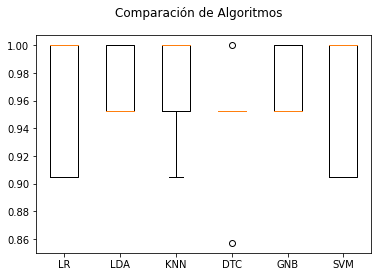

In [ ]:
#Visualización de la comparación de modelos
fig = plt.figure()
fig.suptitle('Comparación de Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nombres)
plt.show()

In [ ]:
from sklearn import model_selection

modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('DTC', DecisionTreeClassifier()))
modelos.append(('GNB', GaussianNB()))
modelos.append(('SVM', SVC()))

#Evaluar cada modelo
resultados = []
nombres = []
for nombre, model in modelos:
  resultados_parciales = model_selection.cross_val_score(model, X_test, y_test, scoring = 'accuracy')
  resultados.append(resultados_parciales)
  nombres.append(nombre)

  print("Modelo: " + nombre + " Promedio: " + str(resultados_parciales.mean()) + " STD: " + str(resultados_parciales.std()))

Modelo: LR Promedio: 1.0 STD: 0.0
Modelo: LDA Promedio: 0.9777777777777779 STD: 0.04444444444444447
Modelo: KNN Promedio: 1.0 STD: 0.0
Modelo: DTC Promedio: 1.0 STD: 0.0
Modelo: GNB Promedio: 1.0 STD: 0.0
Modelo: SVM Promedio: 1.0 STD: 0.0
